In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
transaction = pd.read_excel(data, 'Transactions', skiprows=1)
transaction

transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       list_price  standard_cost  product_first_sold_date  
0           71.49          53.62                  41245.0  
1         2091.47         388.92                  41701.0  
2         1793.43         248.82                  36361.0  
3         1198.46         381.10                  36145.0  
4         1765.30         709.48                  42226.0  
...           ...            ...                      ...  
19995     2005.66        1203.40                  37823.0  
19996      416.98         312.74                  35560.0  
19997     1636.90          44.71                  40410.0  
19998      227.88         136.73                  38216.0  
19999     1775.81        1580.47                  36334.0  

[20000 rows x 13 columns]

In [4]:
columns_drop = ["transaction_date", "product_first_sold_date"]
transaction.drop(columns_drop, axis = 1, inplace=True)
transaction

transaction_id  product_id  customer_id  online_order order_status  \
0                   1           2         2950           0.0     Approved   
1                   2           3         3120           1.0     Approved   
2                   3          37          402           0.0     Approved   
3                   4          88         3135           0.0     Approved   
4                   5          78          787           1.0     Approved   
...               ...         ...          ...           ...          ...   
19995           19996          51         1018           1.0     Approved   
19996           19997          41          127           1.0     Approved   
19997           19998          87         2284           1.0     Approved   
19998           19999           6         2764           0.0     Approved   
19999           20000          11         1144           1.0     Approved   

                brand product_line product_class product_size  list_price  \
0               Solex     Standard        medium       medium       71.49   
1       Trek Bicycles     Standard        medium        large     2091.47   
2          OHM Cycles     Standard           low       medium     1793.43   
3      Norco Bicycles     Standard        medium       medium     1198.46   
4      Giant Bicycles     Standard        medium        large     1765.30   
...               ...          ...           ...          ...         ...   
19995      OHM Cycles     Standard          high       medium     2005.66   
19996           Solex         Road        medium       medium      416.98   
19997      OHM Cycles     Standard        medium       medium     1636.90   
19998      OHM Cycles     Standard          high       medium      227.88   
19999   Trek Bicycles     Standard        medium        small     1775.81   

       standard_cost  
0              53.62  
1             388.92  
2             248.82  
3             381.10  
4             709.48  
...              ...  
19995        1203.40  
19996         312.74  
19997          44.71  
19998         136.73  
19999        1580.47  

[20000 rows x 11 columns]

In [5]:
customerdemographic = pd.read_excel(data, "CustomerDemographic", skiprows=1)

C:\Users\dongv\AppData\Local\Temp\ipykernel_14888\1985388101.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemographic = pd.read_excel(data, "CustomerDemographic", skiprows=1)


In [6]:
len(customerdemographic['DOB'].unique())

3449

In [7]:
customerdemographic['DOB_Clean']= pd.to_datetime(customerdemographic['DOB'])

In [8]:
customerdemographic['age']= 2020-pd.DatetimeIndex(customerdemographic['DOB_Clean']).year

<function matplotlib.pyplot.show(close=None, block=None)>

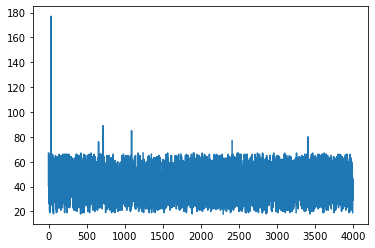

In [9]:
plt.plot(customerdemographic['age'])
plt.show

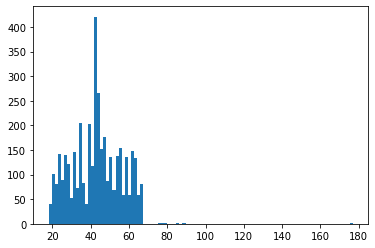

In [10]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [11]:
customerdemographic = customerdemographic[customerdemographic['age']<100]

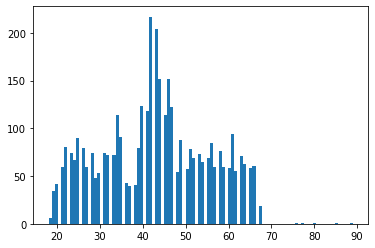

In [12]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [13]:
customerdemographic.columns


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'DOB_Clean', 'age'],
      dtype='object')

In [14]:
customerdemographic= customerdemographic[['customer_id', 'gender', 'past_3_years_bike_related_purchases', 
                                           'job_title', 'job_industry_category', 'wealth_segment',
                                           'owns_car', 'tenure', 'age']]

In [15]:
print(customerdemographic['gender'].unique())
#customerdemographic.loc[4].at['gender']
customerdemographic.iat[2,1]

['F' 'Male' 'Female' 'Femal' 'M']


'Male'

In [16]:
customerdemographic.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3998, 3999],
           dtype='int64', length=3912)

In [17]:
for i in customerdemographic.index:
    if customerdemographic.at[i,'gender'] == 'F' or customerdemographic.at[i,'gender']=='Femal':
        customerdemographic.at[i,'gender'] = 'Female'
    if customerdemographic.at[i,'gender'] == 'M':
        customerdemographic.at[i,'gender'] = 'Male'
    

In [18]:
customerdemographic['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
merge = transaction.join(customerdemographic.set_index('customer_id'), on='customer_id')

In [20]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  int64  
 1   product_id                           20000 non-null  int64  
 2   customer_id                          20000 non-null  int64  
 3   online_order                         19640 non-null  float64
 4   order_status                         20000 non-null  object 
 5   brand                                19803 non-null  object 
 6   product_line                         19803 non-null  object 
 7   product_class                        19803 non-null  object 
 8   product_size                         19803 non-null  object 
 9   list_price                           20000 non-null  float64
 10  standard_cost                        19803 non-null  float64
 11  gender                      

In [21]:
address = pd.read_excel(data, 'CustomerAddress', skiprows=1, )

In [22]:
address= address[['customer_id', 'state', 'property_valuation']]

In [23]:
pd.set_option('display.max_columns', 30)

merge = merge.join(address.set_index('customer_id'), on='customer_id')

In [40]:
merge.dropna(axis=0, how = 'any', inplace=True)

In [41]:
merge.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
age                                    0
state                                  0
property_valuation                     0
dtype: int64

In [42]:
merge

transaction_id  product_id  customer_id  online_order order_status  \
0                   1           2         2950           0.0     Approved   
1                   2           3         3120           1.0     Approved   
2                   3          37          402           0.0     Approved   
3                   4          88         3135           0.0     Approved   
5                   6          25         2339           1.0     Approved   
...               ...         ...          ...           ...          ...   
19994           19995           9          718           1.0     Approved   
19995           19996          51         1018           1.0     Approved   
19996           19997          41          127           1.0     Approved   
19997           19998          87         2284           1.0     Approved   
19999           20000          11         1144           1.0     Approved   

                brand product_line product_class product_size  list_price  \
0               Solex     Standard        medium       medium       71.49   
1       Trek Bicycles     Standard        medium        large     2091.47   
2          OHM Cycles     Standard           low       medium     1793.43   
3      Norco Bicycles     Standard        medium       medium     1198.46   
5      Giant Bicycles         Road        medium       medium     1538.99   
...               ...          ...           ...          ...         ...   
19994      OHM Cycles         Road        medium       medium      742.54   
19995      OHM Cycles     Standard          high       medium     2005.66   
19996           Solex         Road        medium       medium      416.98   
19997      OHM Cycles     Standard        medium       medium     1636.90   
19999   Trek Bicycles     Standard        medium        small     1775.81   

       standard_cost  gender  past_3_years_bike_related_purchases  \
0              53.62    Male                                 19.0   
1             388.92  Female                                 89.0   
2             248.82    Male                                  9.0   
3             381.10    Male                                 83.0   
5             829.65    Male                                  3.0   
...              ...     ...                                  ...   
19994         667.40  Female                                 38.0   
19995        1203.40    Male                                  1.0   
19996         312.74  Female                                 81.0   
19997          44.71  Female                                 83.0   
19999        1580.47    Male                                 73.0   

                        job_title job_industry_category     wealth_segment  \
0             Software Engineer I    Financial Services      Mass Customer   
1             Clinical Specialist                Health      Mass Customer   
2      Desktop Support Technician                Retail  Affluent Customer   
3                 Staff Scientist    Financial Services      Mass Customer   
5                 Web Designer II              Property  Affluent Customer   
...                           ...                   ...                ...   
19994                  Engineer I         Manufacturing      Mass Customer   
19995          Help Desk Operator         Manufacturing      Mass Customer   
19996        Compensation Analyst    Financial Services      Mass Customer   
19997         Staff Accountant IV    Telecommunications     High Net Worth   
19999    Environmental Specialist                Health     High Net Worth   

      owns_car  tenure   age state  property_valuation  
0          Yes    10.0  65.0   VIC                 6.0  
1          Yes    10.0  41.0   NSW                 5.0  
2           No    22.0  43.0   NSW                 1.0  
3           No    16.0  58.0   NSW                10.0  
5          Yes    16.0  62.0   NSW                10.0  
...        ...     ...   ...   ...               

In [43]:
merge.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'state', 'property_valuation'],
      dtype='object')

###### 

In [44]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
merge[['order_status','brand','product_line', 'product_class', 'product_size',
       'gender', 'job_title', 'job_industry_category', 
       'wealth_segment', 'owns_car','state']] = ord_enc.fit_transform(merge[['order_status','brand','product_line', 
                                                                     'product_class', 'product_size',
       'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']])

In [45]:
merge

transaction_id  product_id  customer_id  online_order  order_status  \
0                   1           2         2950           0.0             0   
1                   2           3         3120           1.0             0   
2                   3          37          402           0.0             0   
3                   4          88         3135           0.0             0   
5                   6          25         2339           1.0             0   
...               ...         ...          ...           ...           ...   
19994           19995           9          718           1.0             0   
19995           19996          51         1018           1.0             0   
19996           19997          41          127           1.0             0   
19997           19998          87         2284           1.0             0   
19999           20000          11         1144           1.0             0   

       brand  product_line  product_class  product_size  list_price  \
0          3             2              2             1       71.49   
1          4             2              2             0     2091.47   
2          2             2              1             1     1793.43   
3          1             2              2             1     1198.46   
5          0             1              2             1     1538.99   
...      ...           ...            ...           ...         ...   
19994      2             1              2             1      742.54   
19995      2             2              0             1     2005.66   
19996      3             1              2             1      416.98   
19997      2             2              2             1     1636.90   
19999      4             2              2             2     1775.81   

       standard_cost  gender  past_3_years_bike_related_purchases  job_title  \
0              53.62       1                                 19.0        155   
1             388.92       0                                 89.0         42   
2             248.82       1                                  9.0         57   
3             381.10       1                                 83.0        168   
5             829.65       1                                  3.0        188   
...              ...     ...                                  ...        ...   
19994         667.40       0                                 38.0         65   
19995        1203.40       1                                  1.0         87   
19996         312.74       0                                 81.0         44   
19997          44.71       0                                 83.0        167   
19999        1580.47       1                                 73.0         69   

       job_industry_category  wealth_segment  owns_car  tenure   age  state  \
0                          2               2         1    10.0  65.0      3   
1                          3               2         1    10.0  41.0      0   
2                          7               0         0    22.0  43.0      0   
3                          2               2         0    16.0  58.0      0   
5                          6               0         1    16.0  62.0      0   
...                      ...             ...       ...     ...   ...    ...   
19994                      5               2         1     7.0  42.0      2   
19995                      5               2         1     7.0  26.0      3   
19996                      2               2         0    19.0  46.0      2   
19997                      8               1         0    14.0  46.0      3   
19999                      3               1         1     5.0  24.0      0   

       property_valuation  
0                     6.0  
1                     5.0  
2                     1.0  
3                    10.0  
5                    10.0  
...                   ...  
19994                11.0  
19995                10.0  
19996                 1.0  
19997                 1.0  

In [46]:
pd.set_option('display.max_rows', 30)

In [47]:
merge.corr()

transaction_id  product_id  customer_id  \
transaction_id                             1.000000   -0.008239    -0.000785   
product_id                                -0.008239    1.000000     0.005301   
customer_id                               -0.000785    0.005301     1.000000   
online_order                               0.005109   -0.000556     0.001381   
order_status                              -0.006794    0.013817    -0.005812   
brand                                      0.011923    0.003084    -0.003522   
product_line                               0.000357    0.130180    -0.010308   
product_class                             -0.006915    0.064576     0.002650   
product_size                              -0.010731   -0.088476    -0.010848   
list_price                                -0.002471    0.085029     0.022661   
standard_cost                             -0.003306    0.029838     0.012619   
gender                                     0.003521    0.006088    -0.026424   
past_3_years_bike_related_purchases       -0.001999   -0.004882     0.012938   
job_title                                 -0.000334    0.009969     0.001292   
job_industry_category                      0.008007    0.001944     0.011982   
wealth_segment                            -0.004075    0.012575    -0.010066   
owns_car                                  -0.005401   -0.043714     0.040552   
tenure                                     0.000633   -0.016159    -0.022371   
age                                       -0.002506   -0.011418    -0.023474   
state                                      0.000793    0.013486    -0.000624   
property_valuation                        -0.006331   -0.002587     0.001587   

                                     online_order  order_status     brand  \
transaction_id                           0.005109     -0.006794  0.011923   
product_id                              -0.000556      0.013817  0.003084   
customer_id                              0.001381     -0.005812 -0.003522   
online_order                             1.000000      0.020281 -0.014822   
order_status                             0.020281      1.000000  0.004370   
brand                                   -0.014822      0.004370  1.000000   
product_line                            -0.005500     -0.001157  0.115498   
product_class                           -0.021552     -0.000520  0.187560   
product_size                             0.009073     -0.005631 -0.017727   
list_price                              -0.003513      0.006894  0.076322   
standard_cost                            0.008578      0.005765 -0.225480   
gender                                   0.010828      0.000066 -0.012477   
past_3_years_bike_related_purchases      0.002157     -0.015263 -0.002660   
job_title                               -0.014328     -0.003646 -0.013456   
job_industry_category                   -0.002861     -0.000551 -0.001815   
wealth_segment                          -0.005815     -0.008780  0.005588   
owns_car                                 0.003976     -0.012812  0.000516   
tenure                                   0.011967      0.018341  0.007685   
age                                     -0.005785      0.007109 -0.000883   
state                                   -0.000288     -0.006932  0.000182   
property_valuation                       0.000358      0.012816  0.004415   

                                     product_line  product_class  \
transaction_id                           0.000357      -0.006915   
product_id                               0.130180       0.064576   
customer_id                             -0.010308       0.002650   
online_order                            -0.005500      -0.021552   
order_status                            -0.001157      -0.000520   
brand                                    0.115498       0.187560   
product_line                             1.000000       0.051005   
product_class                        

In [48]:
merge.corr()

transaction_id  product_id  customer_id  \
transaction_id                             1.000000   -0.008239    -0.000785   
product_id                                -0.008239    1.000000     0.005301   
customer_id                               -0.000785    0.005301     1.000000   
online_order                               0.005109   -0.000556     0.001381   
order_status                              -0.006794    0.013817    -0.005812   
brand                                      0.011923    0.003084    -0.003522   
product_line                               0.000357    0.130180    -0.010308   
product_class                             -0.006915    0.064576     0.002650   
product_size                              -0.010731   -0.088476    -0.010848   
list_price                                -0.002471    0.085029     0.022661   
standard_cost                             -0.003306    0.029838     0.012619   
gender                                     0.003521    0.006088    -0.026424   
past_3_years_bike_related_purchases       -0.001999   -0.004882     0.012938   
job_title                                 -0.000334    0.009969     0.001292   
job_industry_category                      0.008007    0.001944     0.011982   
wealth_segment                            -0.004075    0.012575    -0.010066   
owns_car                                  -0.005401   -0.043714     0.040552   
tenure                                     0.000633   -0.016159    -0.022371   
age                                       -0.002506   -0.011418    -0.023474   
state                                      0.000793    0.013486    -0.000624   
property_valuation                        -0.006331   -0.002587     0.001587   

                                     online_order  order_status     brand  \
transaction_id                           0.005109     -0.006794  0.011923   
product_id                              -0.000556      0.013817  0.003084   
customer_id                              0.001381     -0.005812 -0.003522   
online_order                             1.000000      0.020281 -0.014822   
order_status                             0.020281      1.000000  0.004370   
brand                                   -0.014822      0.004370  1.000000   
product_line                            -0.005500     -0.001157  0.115498   
product_class                           -0.021552     -0.000520  0.187560   
product_size                             0.009073     -0.005631 -0.017727   
list_price                              -0.003513      0.006894  0.076322   
standard_cost                            0.008578      0.005765 -0.225480   
gender                                   0.010828      0.000066 -0.012477   
past_3_years_bike_related_purchases      0.002157     -0.015263 -0.002660   
job_title                               -0.014328     -0.003646 -0.013456   
job_industry_category                   -0.002861     -0.000551 -0.001815   
wealth_segment                          -0.005815     -0.008780  0.005588   
owns_car                                 0.003976     -0.012812  0.000516   
tenure                                   0.011967      0.018341  0.007685   
age                                     -0.005785      0.007109 -0.000883   
state                                   -0.000288     -0.006932  0.000182   
property_valuation                       0.000358      0.012816  0.004415   

                                     product_line  product_class  \
transaction_id                           0.000357      -0.006915   
product_id                               0.130180       0.064576   
customer_id                             -0.010308       0.002650   
online_order                            -0.005500      -0.021552   
order_status                            -0.001157      -0.000520   
brand                                    0.115498       0.187560   
product_line                             1.000000       0.051005   
product_class                        

In [50]:
merge

transaction_id  product_id  customer_id  online_order  order_status  \
0                   1           2         2950           0.0             0   
1                   2           3         3120           1.0             0   
2                   3          37          402           0.0             0   
3                   4          88         3135           0.0             0   
5                   6          25         2339           1.0             0   
...               ...         ...          ...           ...           ...   
19994           19995           9          718           1.0             0   
19995           19996          51         1018           1.0             0   
19996           19997          41          127           1.0             0   
19997           19998          87         2284           1.0             0   
19999           20000          11         1144           1.0             0   

       brand  product_line  product_class  product_size  list_price  \
0          3             2              2             1       71.49   
1          4             2              2             0     2091.47   
2          2             2              1             1     1793.43   
3          1             2              2             1     1198.46   
5          0             1              2             1     1538.99   
...      ...           ...            ...           ...         ...   
19994      2             1              2             1      742.54   
19995      2             2              0             1     2005.66   
19996      3             1              2             1      416.98   
19997      2             2              2             1     1636.90   
19999      4             2              2             2     1775.81   

       standard_cost  gender  past_3_years_bike_related_purchases  job_title  \
0              53.62       1                                 19.0        155   
1             388.92       0                                 89.0         42   
2             248.82       1                                  9.0         57   
3             381.10       1                                 83.0        168   
5             829.65       1                                  3.0        188   
...              ...     ...                                  ...        ...   
19994         667.40       0                                 38.0         65   
19995        1203.40       1                                  1.0         87   
19996         312.74       0                                 81.0         44   
19997          44.71       0                                 83.0        167   
19999        1580.47       1                                 73.0         69   

       job_industry_category  wealth_segment  owns_car  tenure   age  state  \
0                          2               2         1    10.0  65.0      3   
1                          3               2         1    10.0  41.0      0   
2                          7               0         0    22.0  43.0      0   
3                          2               2         0    16.0  58.0      0   
5                          6               0         1    16.0  62.0      0   
...                      ...             ...       ...     ...   ...    ...   
19994                      5               2         1     7.0  42.0      2   
19995                      5               2         1     7.0  26.0      3   
19996                      2               2         0    19.0  46.0      2   
19997                      8               1         0    14.0  46.0      3   
19999                      3               1         1     5.0  24.0      0   

       property_valuation  
0                     6.0  
1                     5.0  
2                     1.0  
3                    10.0  
5                    10.0  
...                   ...  
19994                11.0  
19995                10.0  
19996                 1.0  
19997                 1.0  

In [52]:
merge.product_line.unique()

array([2, 1, 0, 3])

In [53]:
import seaborn as sns


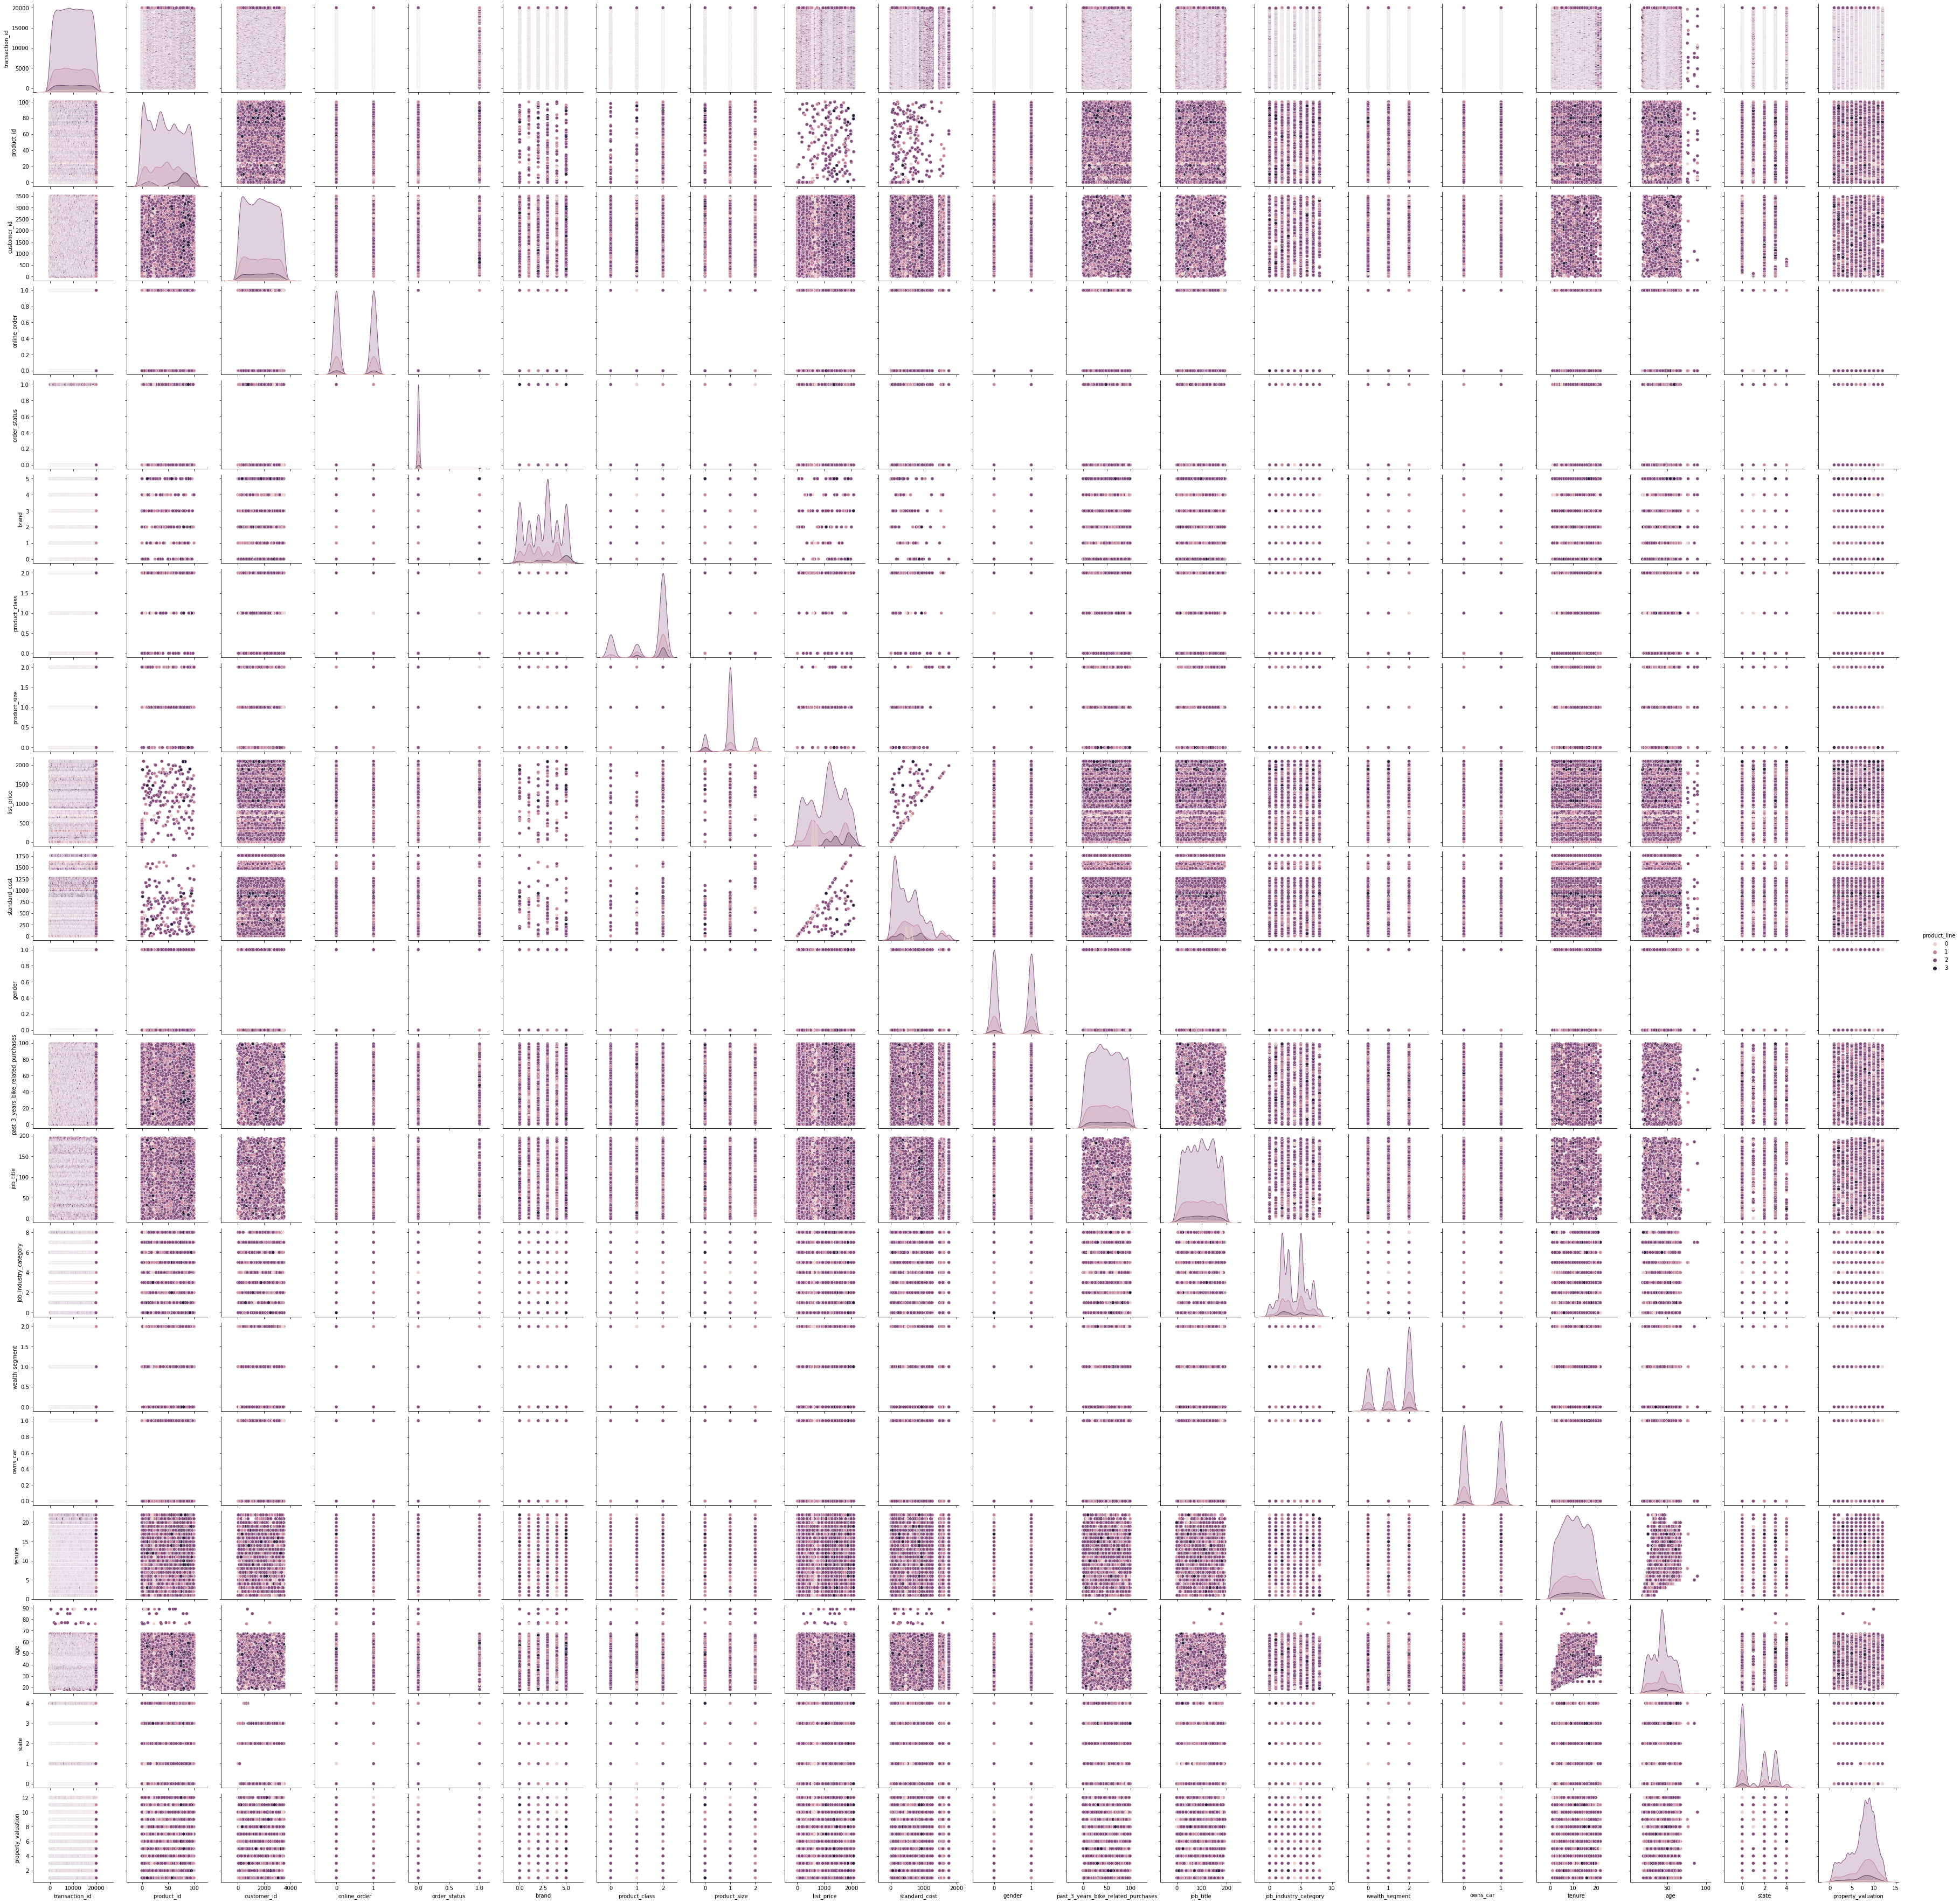

In [56]:
sns.pairplot(merge, hue='product_line')

# run a model try to predict product_line for customer to provide appropriate marketing strategy